In [4]:
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as fits
from astropy.table import Table
import pandas as pd
from astropy.table import vstack

# BOX PLOTS

In [7]:
local_dir='/home/holman/FILES/catalogs/'

def extrac_compac(name, rnag = 3):
    T1 = Table()
    T2 = Table()
    T3 = Table()
    for x in range(rnag):
        if (x==0):
            n = local_dir+name+'rejection_log_'+'A'+'.fits.gz'
            file = fits.open(n)
            T1 = Table.read(file[1])
        if (x==1):
            n = local_dir+name+'rejection_log_'+'B'+'.fits.gz'
            file = fits.open(n)
            T2 = Table.read(file[1])
        if (x==2):
            n = local_dir+name+'rejection_log_'+'C'+'.fits.gz'
            file = fits.open(n)
            T3 = Table.read(file[1])
    FT = vstack(([T1,T2,T3]))
    return FT[FT['REJECTION_STATUS'] == 'accepted']

In [10]:
A = extrac_compac('DR14')
B = extrac_compac('DR16')
C = Table.read(fits.open(local_dir +'DESIrejection_log.fits.gz')[1])

In [11]:
X = A[(A['FOREST_SIZE'] >= 75)]
Y = B[(B['FOREST_SIZE'] >= 75)]
Z = C[(C['REJECTION_STATUS'] == 'accepted') & (C['FOREST_SIZE'] >= 75)]

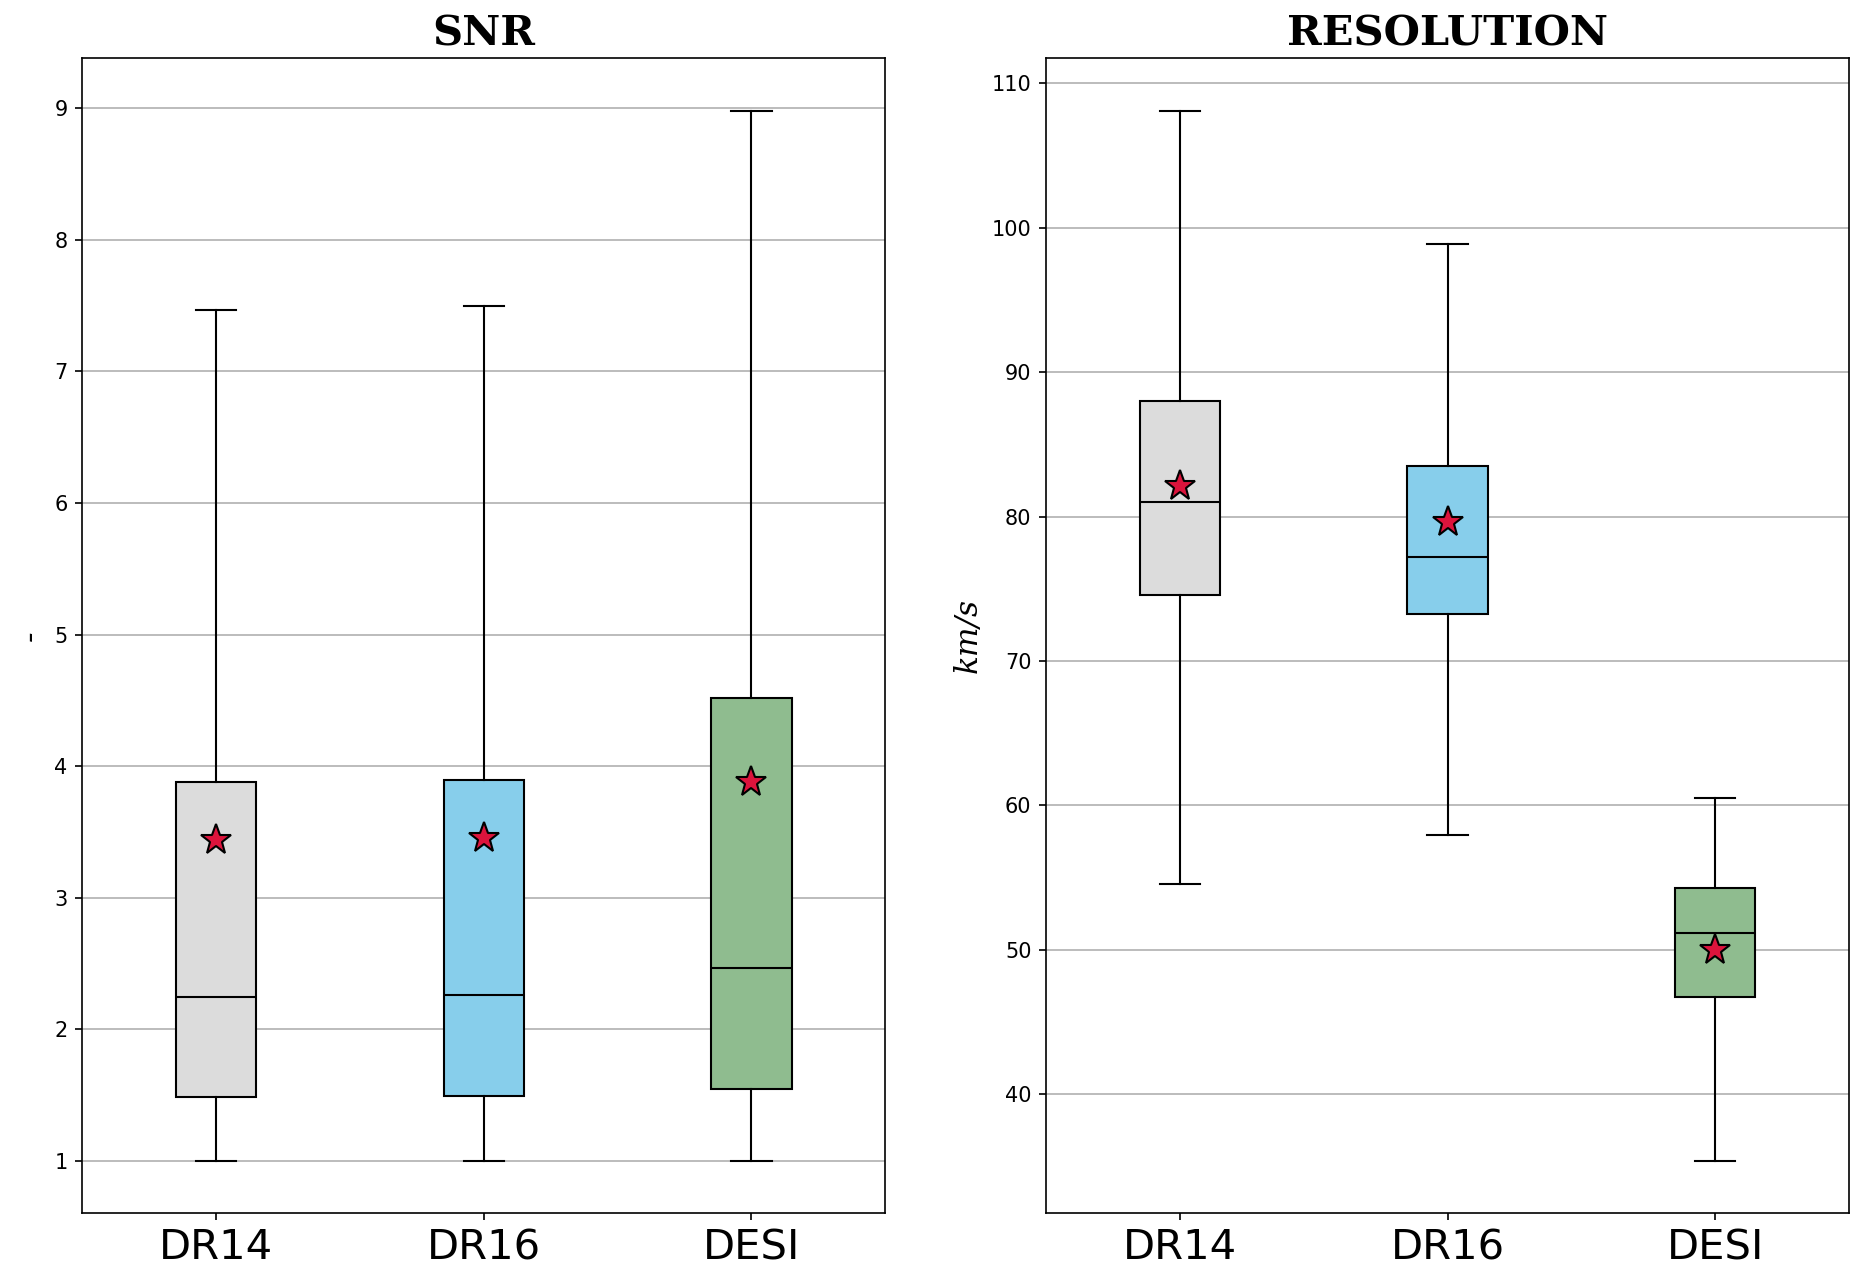

In [13]:
SNR = [np.array(X['MEANSNR']),np.array(Y['MEANSNR']),np.array(Z['MEANSNR'])]
RESO = [np.array(X['MEANRESO']),np.array(Y['MEANRESO']),np.array(Z['MEANRESO'])]
PIX = [np.array(X['MEANRESO_PIX']),np.array(Y['MEANRESO_PIX']),np.array(Z['MEANRESO_PIX'])]
Zav = [np.array(X['MEANZ']),np.array(Y['MEANZ']),np.array(Z['MEANZ'])]

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15.2, 10), dpi = 150)
labels = ['DR14','DR16','DESI']
bplot1 = ax1.boxplot(SNR,
                     vert=True, 
                     patch_artist=True,  
                     labels=labels,
                     showfliers=False,
                     meanline = False,
                     showmeans=True,
                     notch =False,
                    medianprops = {'color' : 'black'},
                    meanprops = {'marker': '*', 'markersize': 15, 'mec' : 'k', 'markerfacecolor' :'crimson'})
ax1.set_title('SNR',weight='semibold', style= 'normal', family = 'serif', size =20)
ax1.set_ylabel('-',style = 'oblique',family = 'serif', size = 15)
ax1.set_xticklabels(labels,fontsize=20)

bplot2 = ax2.boxplot(RESO,
                     vert=True, 
                     patch_artist=True,  
                     labels=labels,
                     showfliers=False,
                     meanline = False,
                     showmeans=True,
                     notch =False,
                    medianprops = {'color' : 'black'},
                    meanprops = {'marker': '*', 'markersize': 15, 'mec' : 'k', 'markerfacecolor' :'crimson'})
ax2.set_title('RESOLUTION',weight='semibold', style= 'normal', family = 'serif', size =20)
ax2.set_ylabel('km/s',style = 'oblique',family = 'serif', size = 15)
ax2.set_xticklabels(labels,fontsize=20)

colors = ['gainsboro', 'skyblue', 'darkseagreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

for ax in [ax1,ax2]:
    ax.yaxis.grid(True)

plt.savefig('box-plots.png', bbox_inches='tight')
plt.show()

In [29]:
snr_frame = pd.DataFrame(data= {
    'STAT': ['N','MEAN','STD','MEDIAN','CI(95%)'],
    'DR14': [len(X), np.mean([X['MEANSNR']]), np.std([X['MEANSNR']]), np.median([X['MEANSNR']]),1.960*((np.std([X['MEANSNR']]))/((len(X))**(1/2)))],
    'DR16': [len(Y), np.mean([Y['MEANSNR']]), np.std([Y['MEANSNR']]), np.median([Y['MEANSNR']]),1.960*((np.std([Y['MEANSNR']]))/((len(Y))**(1/2)))],
    'DESI': [len(Z), np.mean([Z['MEANSNR']]), np.std([Z['MEANSNR']]), np.median([Z['MEANSNR']]),1.960*((np.std([Z['MEANSNR']]))/((len(Z))**(1/2)))]
    })
snr_frame

,STAT,DR14,DR16,DESI
0,N,231751.000000,231456.000000,11077.000000
1,MEAN,3.441729,3.450650,3.881625
2,STD,3.953952,3.959976,4.062582
3,MEDIAN,2.249173,2.260000,2.467700
4,CI(95%),0.016098,0.016133,0.075657


In [30]:
reso_frame = pd.DataFrame(data= {
    'STAT': ['N','MEAN','STD','MEDIAN','CI(95%)'],
    'DR14': [len(X), np.mean([X['MEANRESO']]), np.std([X['MEANRESO']]), np.median([X['MEANRESO']]),1.960*((np.std([X['MEANRESO']]))/((len(X))**(1/2)))],
    'DR16': [len(Y), np.mean([Y['MEANRESO']]), np.std([Y['MEANRESO']]), np.median([Y['MEANRESO']]),1.960*((np.std([Y['MEANRESO']]))/((len(Y))**(1/2)))],
    'DESI': [len(Z), np.mean([Z['MEANRESO']]), np.std([Z['MEANRESO']]), np.median([Z['MEANRESO']]),1.960*((np.std([Z['MEANRESO']]))/((len(Z))**(1/2)))]
    })
reso_frame

,STAT,DR14,DR16,DESI
0,N,231751.000000,231456.000000,11077.000000
1,MEAN,82.116044,79.608688,50.010391
2,STD,11.417360,10.167358,5.464356
3,MEDIAN,81.042088,77.187132,51.162929
4,CI(95%),0.046485,0.041422,0.101762


In [21]:
import scipy.stats as stats
 
# Creating data groups
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12])
data_group2 = np.array([15, 17, 14, 17, 14, 8, 12,
                        19, 19, 14, 17, 22, 24, 16,
                        13, 16, 13, 18, 15, 13])
 
# Print the variance of both data groups
print(np.var(X['MEANRESO']), np.var(Y['MEANRESO']))
print(np.var(X['MEANSNR']), np.var(Y['MEANSNR']))

130.35611242134487 103.3751760308071
15.633734703318135 15.68140785793255


In [19]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=X['MEANRESO'], b=Y['MEANRESO'], equal_var=True)

TtestResult(statistic=78.92473200572108, pvalue=0.0, df=463205.0)

# REJECTION STATUS

In [170]:
file = fits.open(os.path.join('/home/holman/FILES/catalogs/','dr14rej_log_'+'A'+'(master).fits.gz'))
table = Table.read(file)
table

FOREST_SIZE,REJECTION_STATUS,LOS_ID,RA,DEC,Z,MEANSNR,BLINDING,WAVE_SOLUTION,DELTA_LOG_LAMBDA,MEANZ,MEANRESO,MEANRESO_PIX,THING_ID,PLATE,MJD,FIBERID
int64,str33,int32,float64,float64,float64,float64,str4,str3,float64,float64,float64,float64,int32,str4,str5,str4
150,low SNR (0.988977706133896),21073834,0.00037140146459540196,-0.18873842907046395,2.715,0.988977706133896,none,log,0.00010000000000021103,2.2753197816371906,79.46623589775778,1.14994481544603,21073834,7167,56604,0290
166,low SNR (0.8606772765038269),233380948,0.0003778838191278567,0.23924370091947555,3.009,0.8606772765038269,none,log,0.00010000000000021103,2.5347093458611663,79.68230119977679,1.1476185083389283,233380948,6177,56268,0384
176,low SNR (0.46877759264779423),36027746,0.00046456184425713783,-0.12045159556987617,3.25,0.46877759264779423,none,log,0.00010000000000021103,2.7467413055140613,70.45408847115256,1.0079829022288322,36027746,7147,56574,0860
43,short_forest,202298564,0.0006580629256576928,0.17731803842818228,2.463,0.7425874626740466,none,log,0.00010000000000021103,2.0997070101914415,83.51864943393441,1.2099267410677532,202298564,6182,56190,0342
65,short_forest,223053451,0.0007059094782886217,0.22035139083617078,2.481,2.745733773822968,none,log,0.00010000000000021103,2.10761606174701,87.94678109975962,1.2740540962952833,223053451,6151,56265,0936
57,short_forest,198508864,0.000792107503202985,0.16946705173789706,2.7769999999999997,1.0783605772832578,none,log,0.00010000000000021103,2.3300726488905097,76.76540426774459,1.1100966862656854,198508864,6182,56190,0338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,accepted,56339130,5.927870087886112,-0.04832304822490108,2.6710000000000003,1.9129903615367683,none,log,0.00010000000000021103,2.2363367747385263,77.74718644402243,1.1255059174515984,56339130,4381,55824,0146
157,accepted,56338737,5.928777770200469,-0.04784759225660126,2.758,3.4036089964422653,none,log,0.00010000000000021103,2.31324619723528,76.41790359670466,1.1053253893147816,56338737,4381,55824,0142


In [1]:
def log_readerv4(name):
    file = os.path.join('/home/holman/FILES/catalogs/',name)
    table = pd.read_csv(file,delim_whitespace=False, skiprows=0,dtype = {'id':str})
    chunks = np.array(table['id'])
    # version,read,accepted (no rejected), short forest, negative mean-too low SNR found, sector
    status = ['v4',0,0,0,0,'empty']
    if ((np.char.find(name, "log_A(v4)", start=0, end=None))>=0):
        status[5] = 'A'
    if ((np.char.find(name, "log_B(v4)", start=0, end=None))>=0):
        status[5] = 'B'
    if ((np.char.find(name, "log_C(v4)", start=0, end=None))>=0):
        status[5] = 'C'

    for x in chunks:
        if ((np.char.find(x, " read", start=0, end=None))>=0):
            status[1] += 1
        if ((np.char.find(x, " accepted", start=0, end=None))>=0):
            status[2] += 1
        if ((np.char.find(x, "forest too short", start=0, end=None))>=0):
            status[3] += 1
        if ((np.char.find(x, "negative mean or too low SNR found", start=0, end=None))>=0):
            status[4] += 1
    return status


In [2]:
def log_readerMASTER(name):
    file = fits.open(os.path.join('/home/holman/FILES/catalogs/',name))
    table = Table.read(file)
    chunks = np.array(table['REJECTION_STATUS'])
    # version,read,accepted (no rejected), short forest, negative mean-too low SNR found, sector
    status = ['master',0,0,0,0,'empty']
    status[1] = len(chunks)
    if ((np.char.find(name, "log_A(master)", start=0, end=None))>=0):
        status[5] = 'A'
    if ((np.char.find(name, "log_B(master)", start=0, end=None))>=0):
        status[5] = 'B'
    if ((np.char.find(name, "log_C(master)", start=0, end=None))>=0):
        status[5] = 'C'

    for x in chunks:
        if ((np.char.find(x, "accepted", start=0, end=None))>=0):
            status[2] += 1
        if ((np.char.find(x, "short_forest", start=0, end=None))>=0):
            status[3] += 1
        if ((np.char.find(x, "low SNR", start=0, end=None))>=0):
            status[4] += 1
    return status


In [67]:
#log_readerMASTER('dr14rej_log_A(master).fits.gz')
#log_readerv4('dr14rej_log_A(v4).log')

compar = pd.DataFrame(columns=['VE1', 'READ1','ACC1','REJ(short)1','REJ(lowSNR)1','SEC1',
                               'VE2', 'READ2','ACC2','REJ(short)2','REJ(lowSNR)2','SEC2'])
sectors = ['A','B','C']

for n in sectors:
    compar.loc[n] = log_readerv4('dr14rej_log_'+n+'(v4).log') + log_readerMASTER('dr14rej_log_'+n+'(master).fits.gz')
    #compar.loc[n+' '] = 

In [68]:
compar

,VE1,READ1,ACC1,REJ(short)1,REJ(lowSNR)1,SEC1,VE2,READ2,ACC2,REJ(short)2,REJ(lowSNR)2,SEC2
A,v4,96881,74610,13221,9050,A,master,96881,60003,13121,23757,A
B,v4,128088,95835,16873,15380,B,master,128088,74434,16479,37175,B
C,v4,157917,125120,15881,16916,C,master,157917,97314,15679,44924,C


In [110]:
V4 = log_readerv4('dr14rej_log_'+'A'+'(v4).log')
MASTER = log_readerMASTER('dr14rej_log_'+'A'+'(master).fits.gz')

In [111]:
print(V4)
print(MASTER)

['v4', 96881, 74610, 13221, 9050, 'A']
['master', 96881, 60003, 13121, 23757, 'A']


In [118]:
A = np.array([V4[2]/V4[1],V4[3]/V4[1], V4[4]/V4[1]])
B = np.array([MASTER[2]/MASTER[1],MASTER[3]/MASTER[1], MASTER[4]/MASTER[1]])

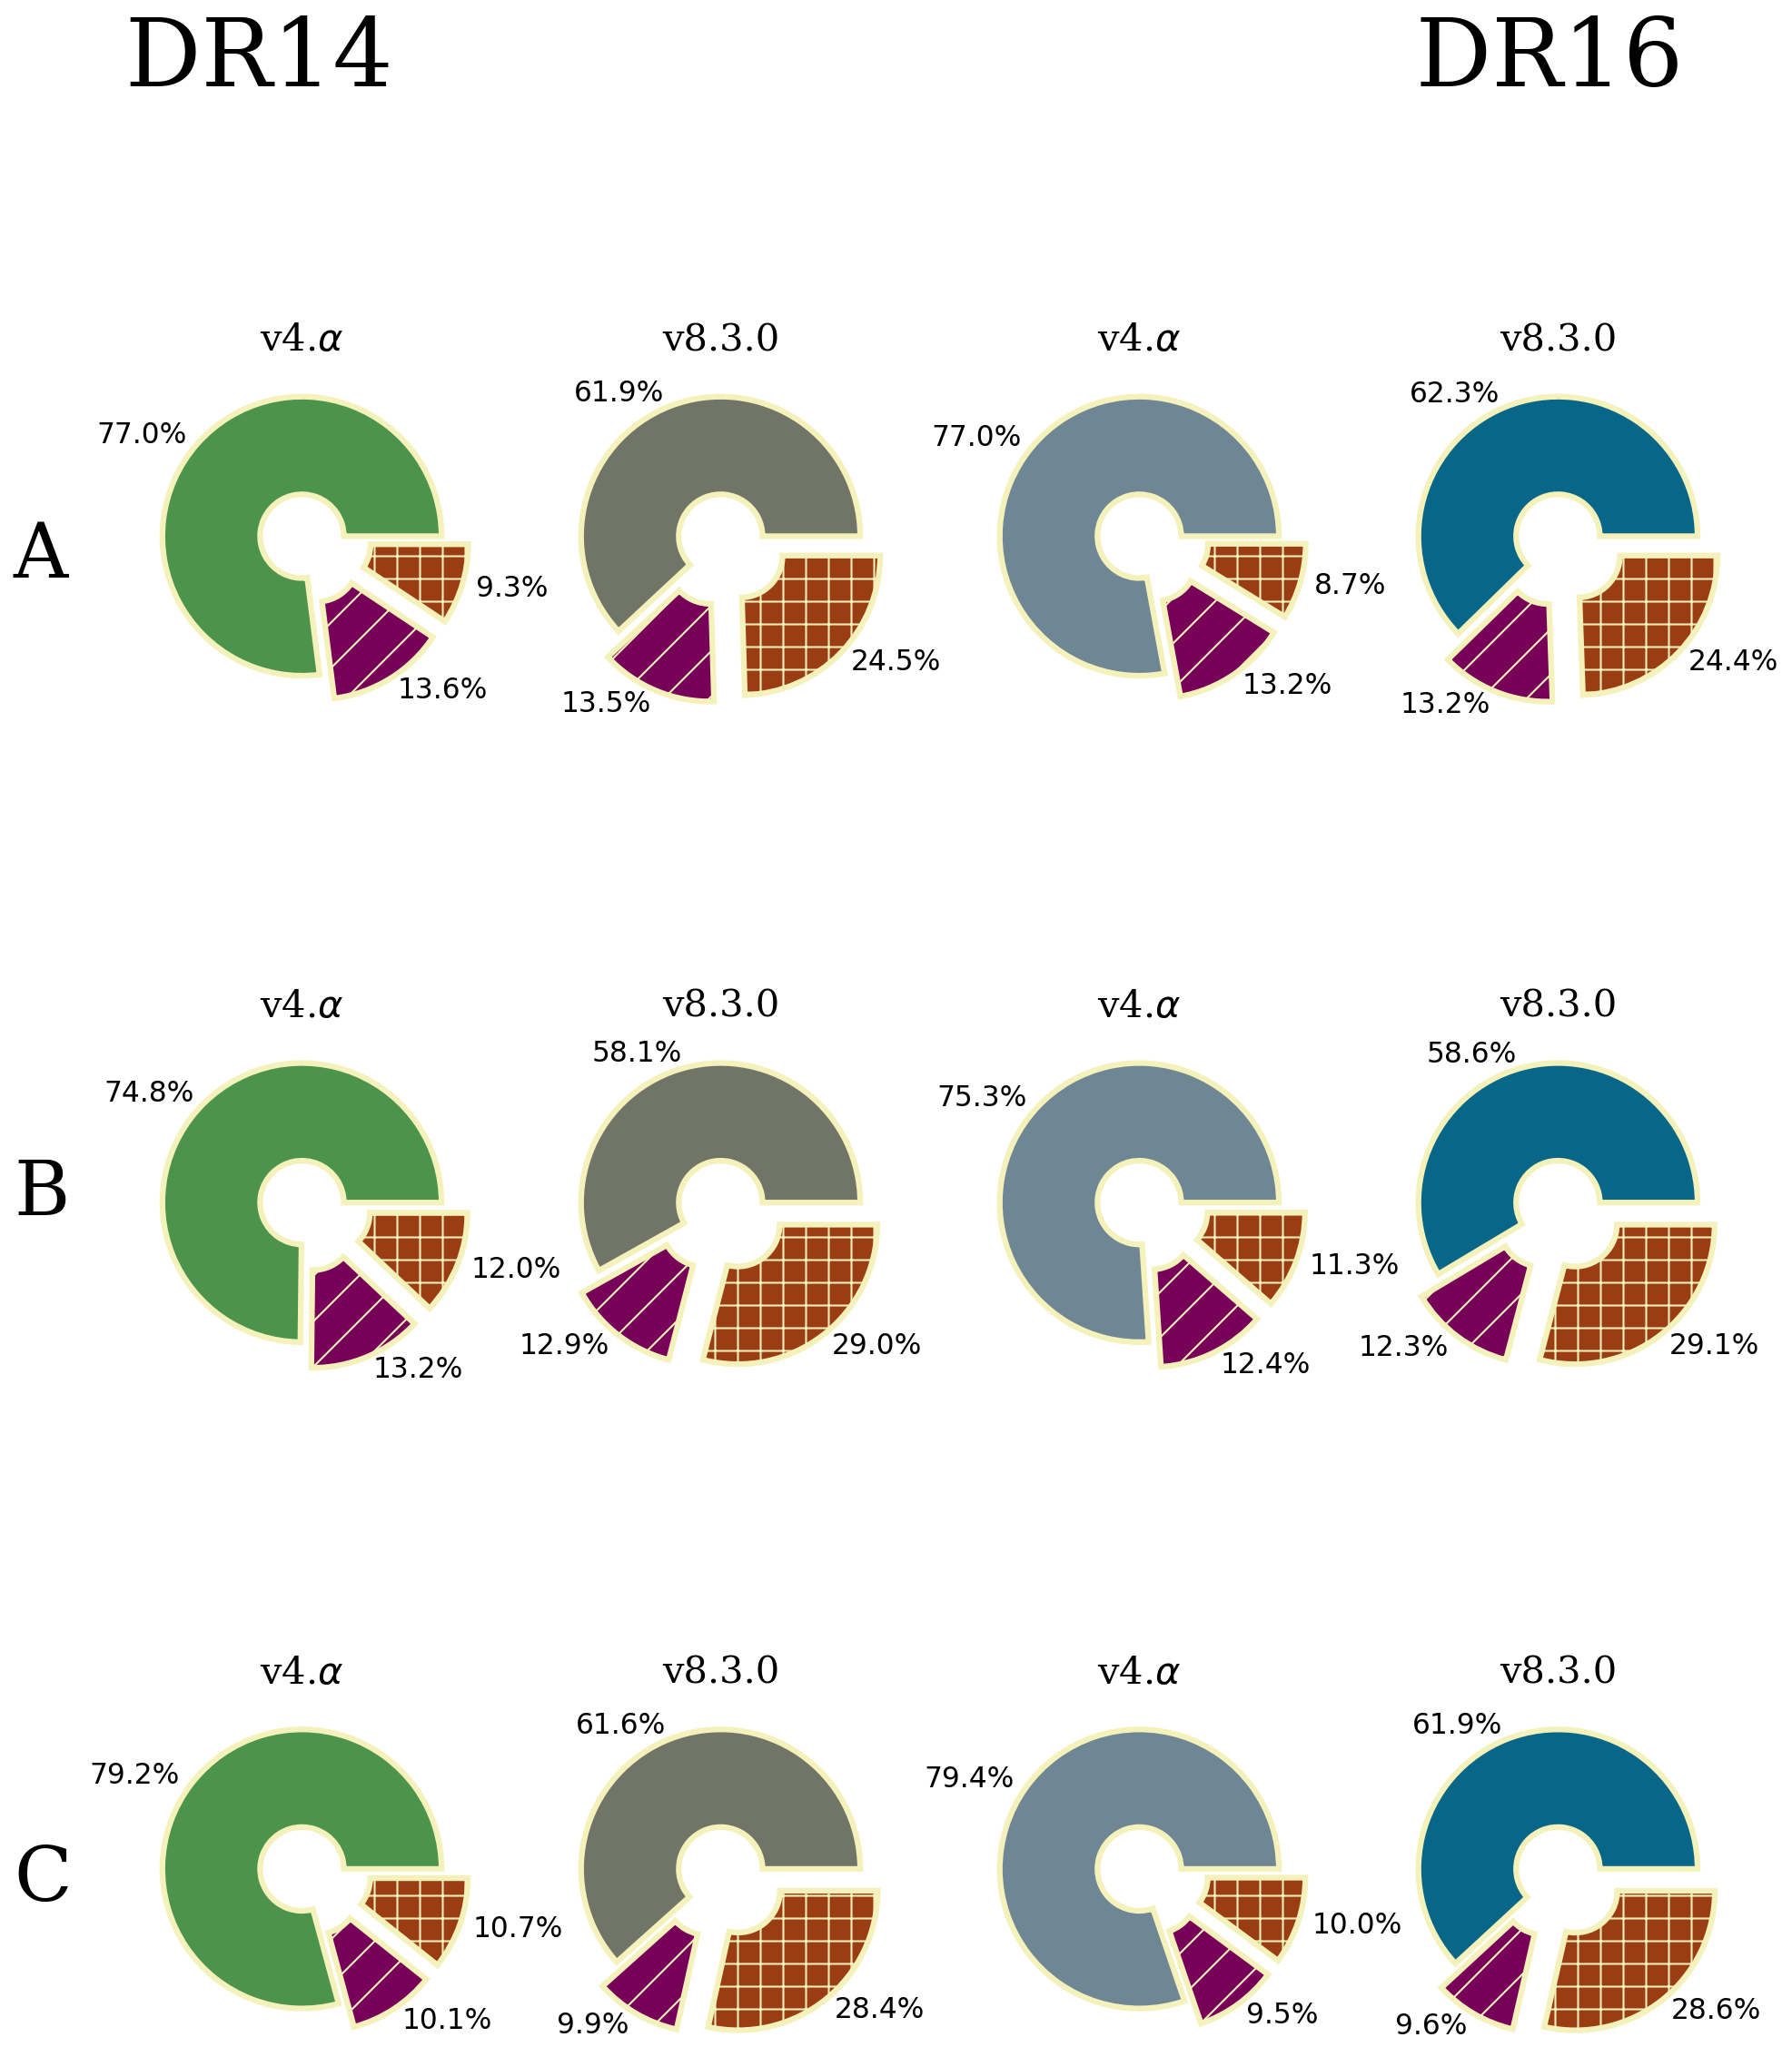

In [6]:
edgecol = '#F4F1BB'


fig,axs = plt.subplots(3, 4,figsize=(15.2,18),dpi=150)
fig.suptitle('DR14                                  DR16',weight='normal', style= 'normal', family = 'serif', size =50)
sec = ['A','B','C']
ex = [0, 0.2, 0.2]

for n in range(len(sec)):
    colrs14 = ["#9B3D12", "#770058","#4C934C"]
    V4 = log_readerv4('dr14rej_log_'+sec[n]+'(v4).log')
    A = np.array([V4[2]/V4[1],V4[3]/V4[1], V4[4]/V4[1]])
    lbl = ['Accepted: ', 'Too short: ', 'Low SNR: ']
    for a in range(len(lbl)):
        lbl[a] = str(round(A[a]*100,1)) + '%'
    axs[n,0].pie(A, startangle=0,labels = lbl, explode = ex, colors =np.flip(colrs14), hatch= ['','/','+'],
    textprops = {'fontsize': 15}, wedgeprops={"edgecolor":edgecol,'linewidth': 3, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
    axs[n,0].set_title(r'v4.$\alpha$',weight='normal', style= 'normal', family = 'serif', size =20)

    colrs14 = ["#9B3D12", "#770058","#717568"]
    MASTER = log_readerMASTER('dr14rej_log_'+sec[n]+'(master).fits.gz')
    B = np.array([MASTER[2]/MASTER[1],MASTER[3]/MASTER[1], MASTER[4]/MASTER[1]])
    lbl = ['Accepted: ', 'Too short: ', 'Low SNR: ']
    for b in range(len(lbl)):
        lbl[b] = str(round(B[b]*100,1)) + '%'
    axs[n,1].pie(B, startangle=0,labels = lbl, explode = ex, colors =np.flip(colrs14), hatch= ['','/','+'],
    textprops = {'fontsize': 15}, wedgeprops={"edgecolor":edgecol,'linewidth': 3, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
    axs[n,1].set_title(r'v8.3.0',weight='normal', style= 'normal', family = 'serif', size =20)



for n in range(len(sec)):
    colrs16 = ["#9B3D12", "#770058","#6F8695"]
    V4 = log_readerv4('dr16rej_log_'+sec[n]+'(v4).log')
    A = np.array([V4[2]/V4[1],V4[3]/V4[1], V4[4]/V4[1]])
    lbl = ['Accepted: ', 'Too short: ', 'Low SNR: ']
    for a in range(len(lbl)):
        lbl[a] = str(round(A[a]*100,1)) + '%'
    axs[n,2].pie(A, startangle=0,labels = lbl, explode = ex, colors =np.flip(colrs16), hatch= ['','/','+'],
    textprops = {'fontsize': 15}, wedgeprops={"edgecolor":edgecol,'linewidth': 3, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
    axs[n,2].set_title(r'v4.$\alpha$',weight='normal', style= 'normal', family = 'serif', size =20)

    colrs16 = ["#9B3D12", "#770058","#086788"]
    MASTER = log_readerMASTER('dr16rej_log_'+sec[n]+'(master).fits.gz')
    B = np.array([MASTER[2]/MASTER[1],MASTER[3]/MASTER[1], MASTER[4]/MASTER[1]])
    lbl = ['Accepted: ', 'Too short: ', 'Low SNR: ']
    for b in range(len(lbl)):
        lbl[b] = str(round(B[b]*100,1)) + '%'
    axs[n,3].pie(B, startangle=0,labels = lbl, explode = ex, colors =np.flip(colrs16), hatch= ['','/','+'],
    textprops = {'fontsize': 15}, wedgeprops={"edgecolor":edgecol,'linewidth': 3, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
    axs[n,3].set_title(r'v8.3.0',weight='normal', style= 'normal', family = 'serif', size =20)

fig.text(0.07, 0.75, 'A', fontsize = 40,weight='normal', style= 'normal', family = 'serif')
fig.text(0.07, 0.49, 'B', fontsize = 40,weight='normal', style= 'normal', family = 'serif')
fig.text(0.07, 0.21, 'C', fontsize = 40,weight='normal', style= 'normal', family = 'serif')

plt.savefig('rejection.png', bbox_inches='tight')
plt.show()

In [91]:

compar = pd.DataFrame(columns=['VERSION', 'READ', 'ACCEPTED','REJECTED(short)','REJECTED(lowSNR)','SECTOR'])
sectors = ['A','B','C']

for n in sectors:
    compar.loc[n] = log_readerv4('dr16rej_log_'+n+'(v4).log')
    compar.loc[n+' '] = log_readerMASTER('dr16rej_log_'+n+'(master).fits.gz')
compar


,VERSION,READ,ACCEPTED,REJECTED(short),REJECTED(lowSNR),SECTOR
A,v4,97460,75081,12817,8472,A
A,master,96370,60052,12761,23557,A
B,v4,128510,96725,15982,14461,B
B,master,127168,74497,15695,36976,B
C,v4,158384,125718,15056,15883,C
C,master,156657,96907,14973,44777,C
